In [1]:
import pandas as pd
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
url1='https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/bogor.csv'
url2='https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/bekasi.csv'
url3='https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/tangerang.csv'
url4='https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/jakarta.csv'
url5='https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/main/data/depok.csv'

In [3]:
bogor= pd.read_csv(url1)
bekasi= pd.read_csv(url2)
tangerang= pd.read_csv(url3)
jakarta= pd.read_csv(url4)
depok= pd.read_csv(url5)

In [4]:
bekasi=bekasi.assign(kota='bekasi')
bogor=bogor.assign(kota='bogor')
jakarta=jakarta.assign(kota='jakarta')
depok=depok.assign(kota='depok')
tangerang=tangerang.assign(kota='tangerang')

In [5]:
frames=[bekasi,bogor,jakarta,depok,tangerang]
properti= pd.concat(frames)

In [6]:
properti

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,kota
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bekasi
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bekasi
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bekasi
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bekasi
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bekasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tangerang
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tangerang
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tangerang
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tangerang


In [7]:
properti = properti.loc[:, ~properti.columns.str.contains('^Unnamed')]
properti.drop("deskripsi", axis=1, inplace=True)
properti.drop("created_at", axis=1, inplace=True)
properti.drop("URL", axis=1, inplace=True)
properti.drop("lokasi", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
properti=properti.dropna()

In [9]:
properti

,LT,LB,KT,KM,garasi,carport,sertifikat,listrik,hadap,harga,kota
17,200.0,250.0,4.0,3.0,1.0,1.0,SHM,2200.0,Selatan,2.300000e+09,bekasi
18,60.0,55.0,2.0,1.0,1.0,1.0,SHM,1300.0,Barat,6.000000e+08,bekasi
24,60.0,40.0,2.0,1.0,1.0,1.0,SHM,1300.0,Timur,3.750000e+08,bekasi
33,200.0,250.0,4.0,3.0,1.0,1.0,SHM,2200.0,Selatan,2.300000e+09,bekasi
38,54.0,84.0,2.0,1.0,1.0,1.0,SHM,1300.0,Timur,6.500000e+08,bekasi
...,...,...,...,...,...,...,...,...,...,...,...
90,180.0,250.0,5.0,4.0,1.0,1.0,SHM,3500.0,Selatan,3.300000e+03,tangerang
101,308.0,492.0,4.0,4.0,2.0,2.0,"lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,Utara,7.700000e+03,tangerang
109,276.0,441.0,4.0,4.0,2.0,2.0,SHM,11000.0,Timur Laut,1.260000e+03,tangerang
118,300.0,148.0,4.0,3.0,2.0,2.0,SHM,2200.0,Timur,1.900000e+03,tangerang


In [10]:
print(properti.shape)
properti.duplicated().sum()

(78, 11)


3

In [11]:
properti[properti.duplicated() == True]

,LT,LB,KT,KM,garasi,carport,sertifikat,listrik,hadap,harga,kota
33,200.0,250.0,4.0,3.0,1.0,1.0,SHM,2200.0,Selatan,2.300000e+09,bekasi
53,100.0,112.0,2.0,2.0,1.0,1.0,SHM,1300.0,Selatan,7.500000e+08,bekasi
97,60.0,72.0,2.0,1.0,0.0,1.0,SHGB,1300.0,Timur,2.150000e+08,bogor


In [12]:
properti.drop_duplicates(inplace=True)
print(properti.duplicated().sum()) # no more duplicates
print(properti.shape)

0
(75, 11)


**NOMOR 1**


Kualitas data yang dimiliki perusahaan.


Data yang dimiliki perusahaan banyak memiliki missing value yang menyebabkan tingkat akurasi data berkurang

**NOMOR 2**


Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.


Dalam melakukan perbaikan data di atas kami malakukan penghapusan pada missing value data. 

**NOMOR 3**


Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

Ada, karena untuk kota Jakarta sebagai ibukota negara harga rumah cenderung tinggi dibandingkan kota-kota yang lain

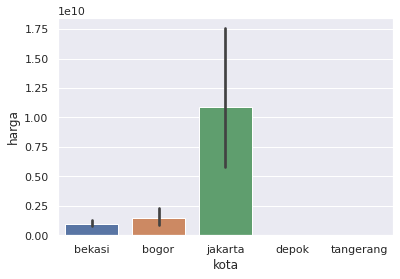

In [13]:
p = sns.barplot(x="kota", y="harga", data=properti)

**NOMOR 4**


Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

Karena cenderung yang meimili harga tinggi di Jakarta, maka kami merekomendasikan membuat kantor cabang di Depok dan Tangerang


**NOMOR 5**

Rumah dengan karakteristik seperti apa yang paling banyak dijual?

In [14]:
import statistics